MUSTANG has lots of options for generating PSD/PDF plots, can be generated using the [builder](http://services.iris.edu/mustang/noise-pdf/docs/1/builder/)

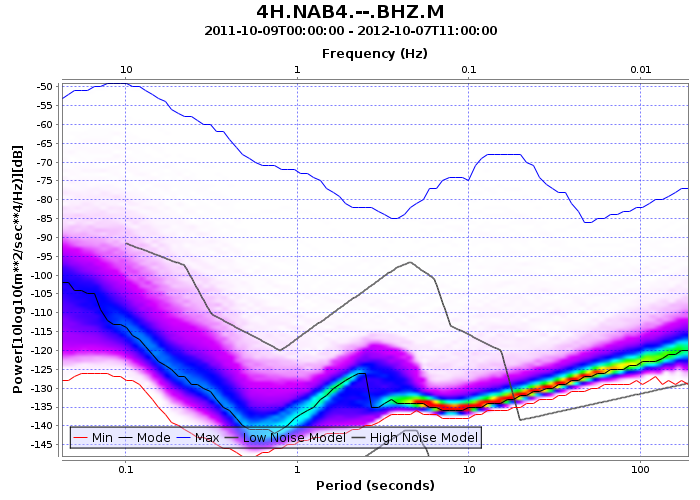

Lab exercise - compute PSD PDF following ObsPy tutorial

In [13]:
# imports
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy import read
from obspy.io.xseed import Parser
from obspy.signal import PPSD

In [17]:
# Get some data and write it to a file
starttime = UTCDateTime("2011-10-10T00:00:00")
endtime = UTCDateTime("2011-10-11T00:00:00")
net = "4H"
sta = "NAB4"
loc = "--"
chan = "BHZ"

client = Client("IRIS")
st = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response=True)

In [23]:
st.write(net + '_' + sta + '.mseed', format="MSEED")
print(st)

1 Trace(s) in Stream:
4H.NAB4..BHZ | 2011-10-10T00:00:00.000000Z - 2011-10-11T00:00:00.000000Z | 50.0 Hz, 4320001 samples


In [22]:
# Get the metadata and save to StationXML
inv = client.get_stations(starttime,
                          endtime,
                          network = net,
                          station = sta,
                          location = loc,
                          channel = chan,
                          level = "response")
print(inv)
inv.write(net + '_' + sta + '.xml', format='stationxml')

Inventory created at 2021-07-04T09:28:49.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.47
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2011-10-10...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			4H
		Stations (1):
			4H.NAB4 (Nabro4)
		Channels (1):
			4H.NAB4..BHZ


In [24]:
tr = st[0]
ppsd = PPSD(tr.stats, metadata=inv)

In [25]:
ppsd.add(st)

True

In [28]:
# get a sorted list of the time slices processed; shwo the first 4 here as an example
print(ppsd.times_processed[:4])

[UTCDateTime(2011, 10, 10, 0, 0), UTCDateTime(2011, 10, 10, 0, 30), UTCDateTime(2011, 10, 10, 1, 0), UTCDateTime(2011, 10, 10, 1, 30)]


In [29]:
# Show the total number of slices
print("Number of PSD slices: ", len(ppsd.times_processed))

Number of PSD slices:  47


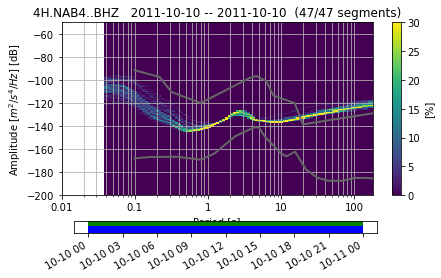

In [30]:
ppsd.plot();

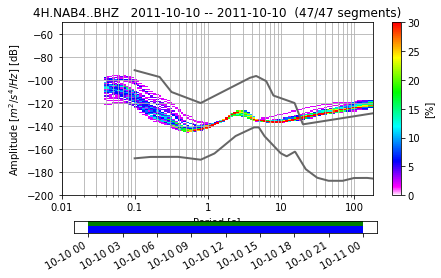

In [32]:
# Use the PQLX colourmap
from obspy.imaging.cm import pqlx
ppsd.plot(cmap=pqlx)

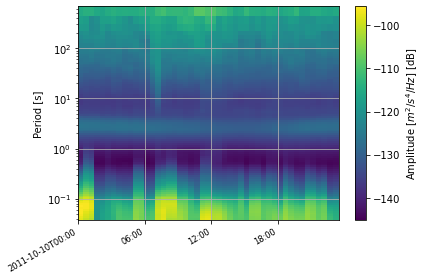

In [33]:
# Plot as spectrogram
ppsd.plot_spectrogram()